In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
label_name = ["airplane", "automobile", "bird", "cat", "deer",  "dog",  "frog",  "horse",  "ship", "truck"]

In [3]:
import glob
import numpy as np
import cv2
import os
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageDraw

D:\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


In [17]:
train_list = glob.glob("./cifar10/data_batch_*")
save_path = "./raw_train"

In [10]:
train_list

['./cifar10\\data_batch_1',
 './cifar10\\data_batch_2',
 './cifar10\\data_batch_3',
 './cifar10\\data_batch_4',
 './cifar10\\data_batch_5']

In [18]:
for l in train_list:
    print(l)
    l_dict = unpickle(l)
    # print(l_dict)
    # print(l_dict.keys())
    
    for im_idx, im_data in enumerate(l_dict[b'data']):
    # print(im_idx)
    # print(im_data)
        im_label = l_dict[b'labels'][im_idx]
        im_name = l_dict[b'filenames'][im_idx]
        im_label_name = label_name[im_label]
        im_data = np.reshape(im_data, [3, 32, 32])
        temp = np.ones([4,32,32])
        temp[0] = im_data[0]
        temp[1] = im_data[1]
        temp[2] = im_data[1]
        temp[3] = im_data[2]
        im_data = np.transpose(temp, (1,2,0))
        if not os.path.exists("{}/{}".format(save_path, im_label_name)):
            os.mkdir("{}/{}".format(save_path, im_label_name))
        cv2.imwrite("{}/{}/{}".format(save_path, im_label_name, im_name.decode('utf-8')), im_data)

./cifar10\data_batch_1
./cifar10\data_batch_2
./cifar10\data_batch_3
./cifar10\data_batch_4
./cifar10\data_batch_5


In [9]:
test_list = glob.glob("./cifar10/test_batch")
test_save_path = "./test"

In [10]:
for l in test_list:
    print(l)
    l_dict = unpickle(l)
    # print(l_dict)
    print(l_dict.keys())

./cifar10/test_batch
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [11]:
for im_idx, im_data in enumerate(l_dict[b'data']):
    # print(im_idx)
    # print(im_data)
    im_label = l_dict[b'labels'][im_idx]
    im_name = l_dict[b'filenames'][im_idx]
    im_label_name = label_name[im_label]
    im_data = np.reshape(im_data, [3, 32, 32])
    im_data = np.transpose(im_data, (1,2,0))
    if not os.path.exists("{}/{}".format(test_save_path, im_label_name)):
        os.mkdir("{}/{}".format(test_save_path, im_label_name))
    cv2.imwrite("{}/{}/{}".format(test_save_path, im_label_name, im_name.decode('utf-8')), im_data)

In [42]:
img1 = l_dict[b'data'][1]

In [43]:
img1 = np.reshape(img1, [3, 32, 32])

In [48]:
img1 = np.transpose(img1, (1,2,0))

In [19]:
type(img1)

numpy.ndarray

In [45]:
img1[0] = 0
img1[2] = 0

In [44]:
img1.shape

(3, 32, 32)

In [49]:
im = Image.fromarray(img1)

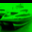

In [50]:
im